In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns

%matplotlib inline

In [7]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# Access the data and target using housing.data and housing.target
print(housing.keys()) # Changed boston_data to housing

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [10]:
#laoding the dataset
housing = fetch_california_housing()
boston = pd.DataFrame(housing.data, columns=housing.feature_names)
boston.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
#creating new column of target values
boston['MEDV'] = housing.target

In [13]:
#data preprocessing
boston.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MEDV,0


<ipython-input-14-7fe1b10ad90a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


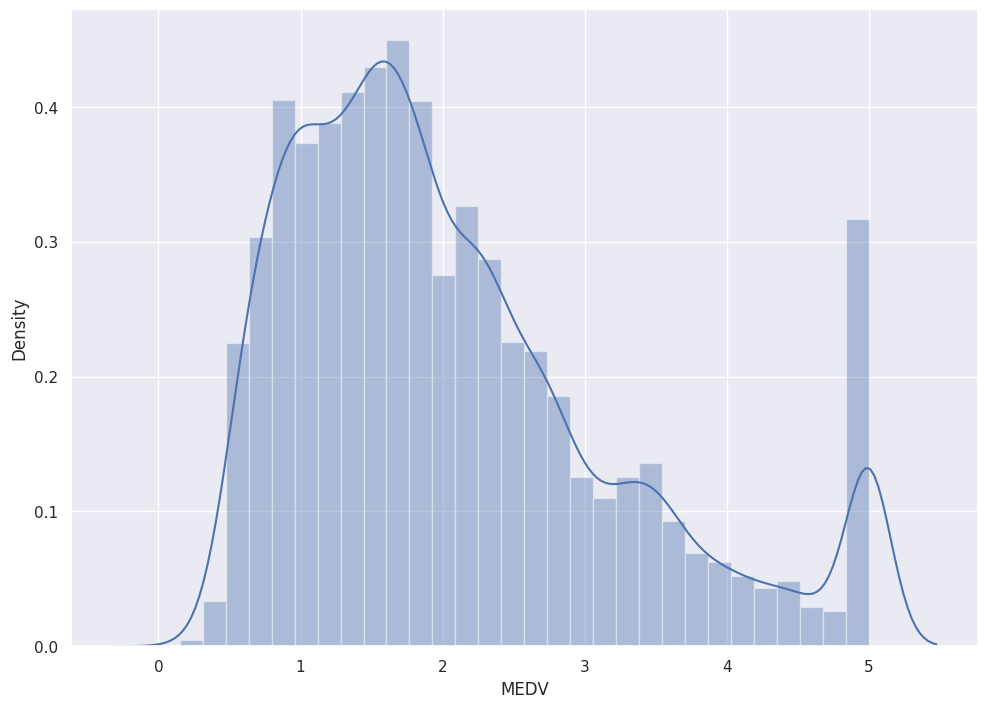

In [14]:
#use the distplot function to check the distribution of MEDV
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

<Axes: >

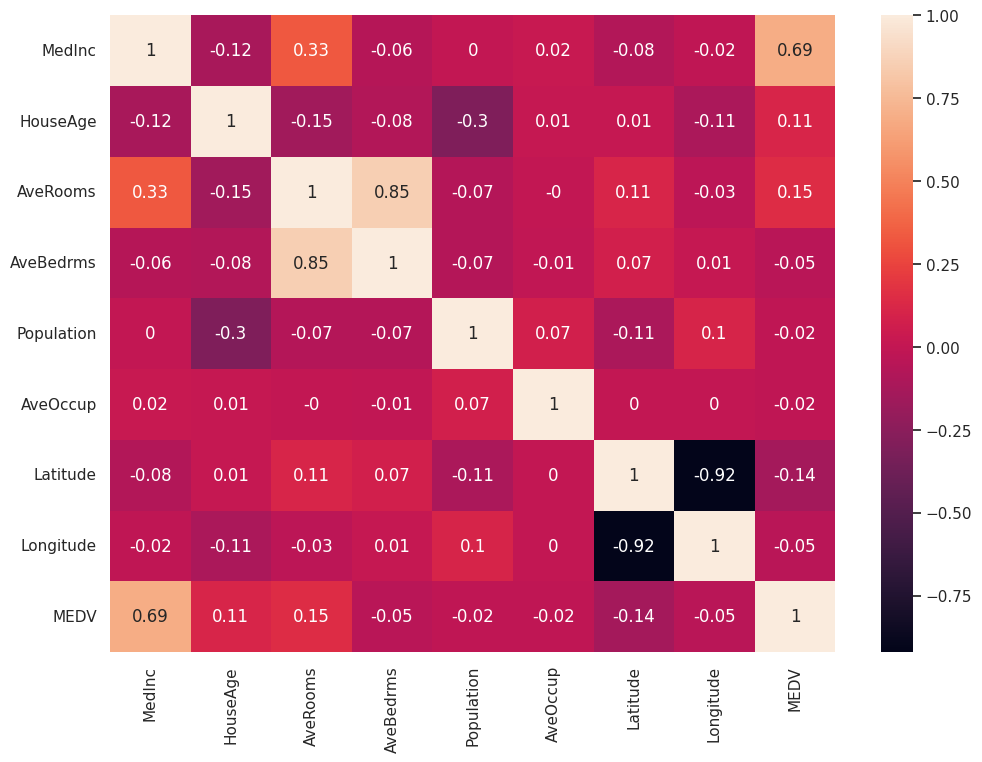

In [15]:
#using heatmap function from the seaborn lib to
# plot the correlation matrix.
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


<ipython-input-21-b1bb067287a8>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(boston['MEDV'], bins=30)


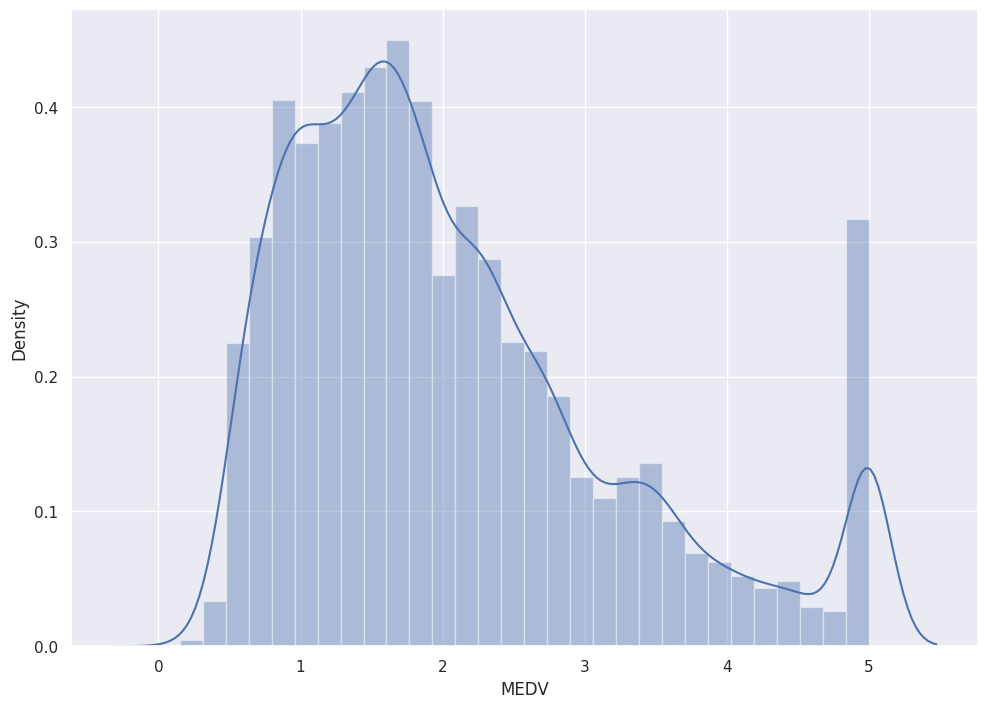

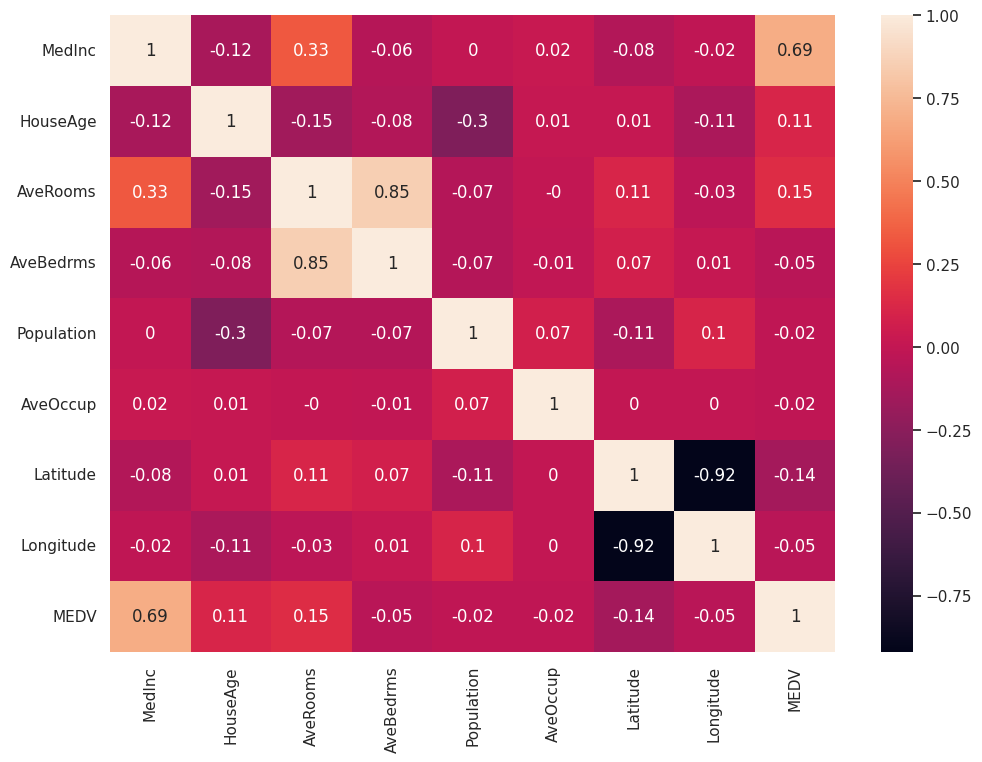

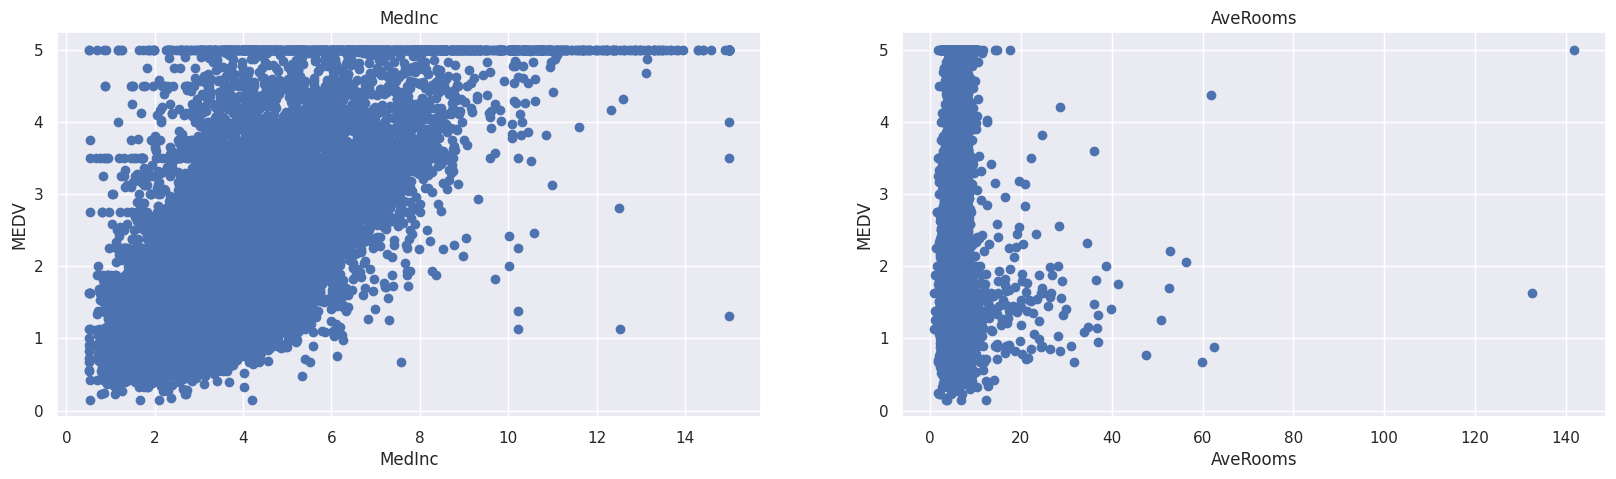

In [21]:


%matplotlib inline
# %%
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
# Access the data and target using housing.data and housing.target
print(housing.keys()) # Changed boston_data to housing
# %%
housing = fetch_california_housing()
boston = pd.DataFrame(housing.data, columns=housing.feature_names)
boston.head()
# %%
boston['MEDV'] = housing.target
# %%
boston.isnull().sum()
# %%
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()
# %%
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
# %%
plt.figure(figsize=(20, 5))

# The California housing dataset uses different feature names.
# Replacing 'LSTAT' and 'RM' with appropriate features
# 'MedInc' and 'AveRooms' for demonstration.

#using scattter plot to see feature of MEEDV
features = ['MedInc', 'AveRooms']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [23]:
#preparing data for training model
X = pd.DataFrame(np.c_[boston['MedInc'], boston['AveRooms']], columns = ['MedInc','AveRooms'])
Y = boston['MEDV']

In [24]:
#splitting data to training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [25]:
#training and testing the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [27]:
#training and testing the model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score # Import r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# %%
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict) # Now r2_score is defined and can be used

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict) # Now r2_score is defined and can be used

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.8317685105583229
R2 score is 0.4756445698174918


The model performance for testing set
--------------------------------------
RMSE is 0.8360370094765345
R2 score is 0.49339279190200946


In [28]:
import sklearn
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
digits = load_digits()
x = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)
log_reg = LogisticRegression()
b = log_reg.fit(X_train,y_train)
c = log_reg.predict(X_test )
print(c)
acc = sklearn.metrics.accuracy_score(y_test, c)
print(acc)

[1 5 0 7 1 0 6 1 5 4 9 2 7 8 4 6 9 3 7 4 7 4 8 6 0 9 6 1 3 7 5 9 8 3 2 8 8
 1 1 0 7 9 0 0 8 7 2 7 4 3 4 3 4 0 4 7 0 5 5 5 2 1 7 0 5 1 8 3 3 4 0 3 7 4
 3 4 2 9 7 3 2 5 3 4 1 5 5 2 1 2 2 2 2 7 0 8 1 7 4 2 3 8 2 3 3 0 2 9 5 2 3
 2 8 1 1 9 1 2 0 4 8 5 4 4 7 6 3 6 6 1 7 5 6 3 8 3 7 1 8 5 3 4 7 8 5 0 6 0
 6 3 7 6 5 6 2 2 2 3 0 7 6 5 6 4 1 0 6 0 6 4 0 9 3 5 1 2 3 1 9 0 7 6 2 9 3
 5 3 4 6 3 3 7 4 9 2 7 6 1 6 8 4 0 3 1 0 9 9 9 0 1 2 6 8 0 9 5 9 8 2 3 5 3
 0 8 7 4 0 3 3 3 6 3 3 2 9 1 6 9 0 4 2 2 7 9 1 6 7 6 8 9 1 8 3 4 0 6 4 8 5
 3 6 3 1 4 0 4 4 8 7 9 1 5 2 7 0 9 0 4 4 0 1 0 6 4 2 8 5 0 2 6 0 1 8 2 0 9
 5 6 2 0 5 0 9 1 4 7 1 7 0 6 6 8 0 2 2 6 9 9 7 5 1 4 6 4 6 1 9 4 7 1 3 7 8
 1 6 9 8 3 2 4 8 7 5 5 6 9 9 8 3 0 0 4 9 3 0 4 9 4 2 5 4 9 6 4 2 6 0 0 5 6
 7 1 9 2 5 1 5 9 8 7 7 0 6 9 3 1 9 3 9 8 7 0 2 3 9 9 2 8 1 9 2 3 0 0 7 3 8
 7 9 9 7 1 0 4 5 4 1 7 3 6 5 4 9 0 5 9 1 4 5 0 4 3 4 2 7 9 0 8 7 8 6 9 4 5
 7 8 3 7 8 3 2 6 6 7 1 0 8 4 8 9 5 4 1 2 5 3 3 3 2 1 8 7 6 2 3 6 2 5 2 6 4
 5 4 4 9 7 9 1 0 2 6 9 3 

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
